# Week 1 - Gamma vs Theta Illustrations


## FINM 37500: Fixed Income Derivatives

### Mark Hendricks

#### Spring 2023

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

import sys
sys.path.insert(0,'../cmds')
from options import *

In [2]:
# AMZN 2022-08-26 call on July 27, 2022
rf = .02
K = 120
IVOL = .45
S0 = 120

TVAL = 3/52

In [3]:
grid_px = np.arange(S0/1.2,S0*(5/4),.1)
dataplot = pd.DataFrame(grid_px,columns = ['grid'], dtype=float)
idS0 = (dataplot['grid'] - S0).abs().idxmin()
dataplot.set_index('grid',inplace=True)

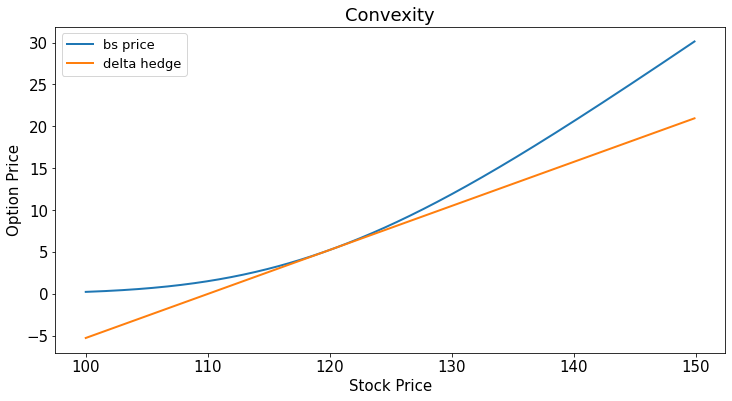

In [4]:
figtitle = f'Convexity'

for spot in grid_px:    
    dataplot.loc[spot,'bs price'] = bs_price(under=spot,strike=K,T=TVAL,rf=rf,vol=IVOL)

beta = bs_delta(under=S0,strike=K,T=TVAL,rf=rf,vol=IVOL)
alpha = dataplot['bs price'].iloc[idS0] - beta * S0
dataplot['delta hedge'] = alpha + beta * grid_px
dataplot.plot(ylabel='Option Price',xlabel='Stock Price',linewidth=2,title=figtitle)
plt.show()

### Hedged Position

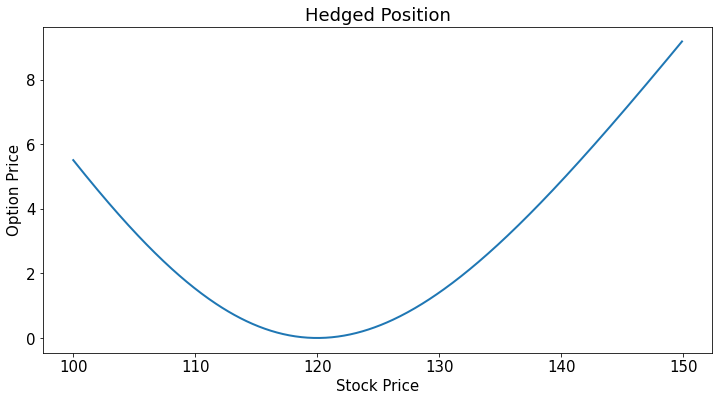

In [14]:
figtitle = 'Hedged Position'

hedged = dataplot.sub(dataplot[['delta hedge']].values,axis=1).drop(columns='delta hedge')
hedged.rename(columns={'bs price':'gross payoff'},inplace=True)
hedged['gross payoff'].plot(ylabel='Option Price',xlabel='Stock Price',linewidth=2,title=figtitle)
plt.show()

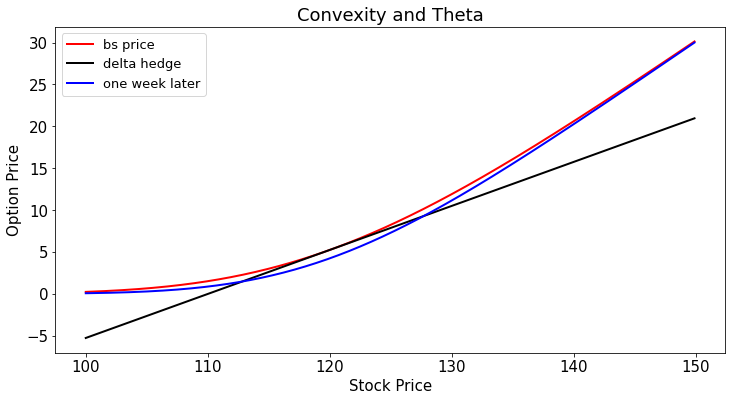

In [6]:
figtitle = 'Convexity and Theta'

Tgrid = [TVAL - 5/252]

for tval in Tgrid:
    for spot in grid_px:
        dataplot.loc[spot,f'one week later'] = bs_price(under=spot,strike=K,T=tval,rf=rf,vol=IVOL)

dataplot.plot(ylabel='Option Price',xlabel='Stock Price',linewidth=2,title=figtitle,color = ['r', 'k','b'])
plt.show()

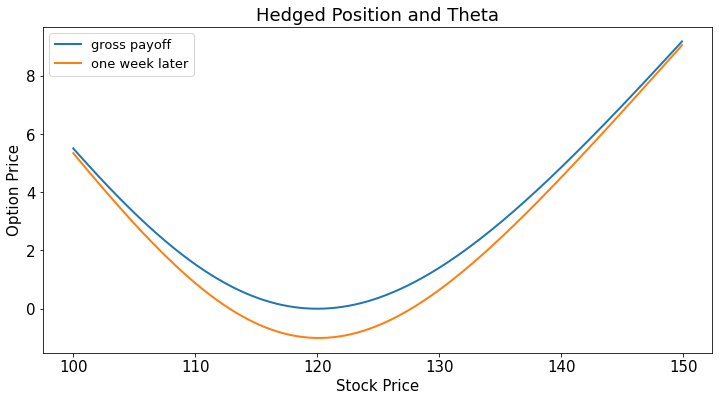

In [15]:
figtitle = 'Hedged Position and Theta'

hedged.plot(ylabel='Option Price',xlabel='Stock Price',linewidth=2,title=figtitle)
plt.show()

# Bounds

In [27]:
# AMZN 2022-08-26 call on July 27, 2022
rf = .05
K = 120
IVOL = .25
S0 = 120

tval = .5

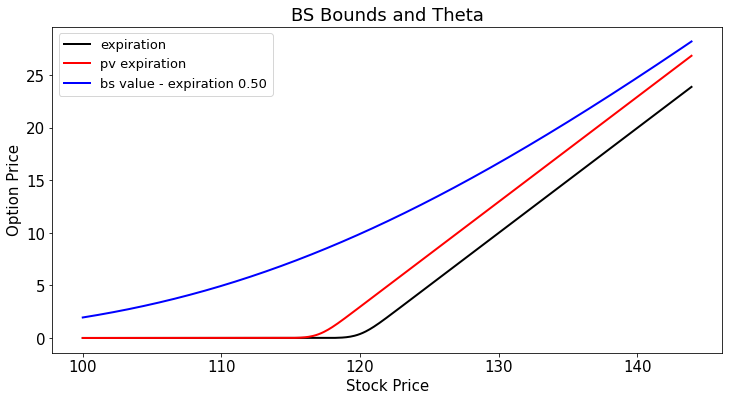

In [28]:
figtitle = 'BS Bounds and Theta'

disc = np.exp(-rf*tval)
grid_px = np.arange(min(S0,K)/1.2,max(S0,K)*1.2,.1)
dataplot_bounds = pd.DataFrame(index=grid_px, dtype=float)
for spot in grid_px:
    dataplot_bounds.loc[spot,f'expiration'] = bs_price(under=spot,strike=K,T=.001,rf=rf,vol=IVOL)
    dataplot_bounds.loc[spot,f'pv expiration'] = bs_price(under=spot,strike=disc * K,T=.001,rf=rf,vol=IVOL)
    
    dataplot_bounds.loc[spot,f'bs value - expiration {tval:.2f}'] = bs_price(under=spot,strike=K,T=tval,rf=rf,vol=IVOL)

dataplot_bounds.plot(ylabel='Option Price',xlabel='Stock Price',linewidth=2,title=figtitle,color=['black','red','blue'])
plt.show()